In [123]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('../dataset/arxiv_sampled.csv')

In [3]:
# extract all abstracts and replace \n token with a space
corpus = []
for index, row in df.iterrows():
    text = row.abstract
    text = text.replace('\n', ' ')
    corpus.append(text)

In [195]:
stop_words = list(STOP_WORDS)
stop_words += ['according', 'able', 'll', 've', 'achieved', 'achieves']
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.02, max_df=0.05)
doc_term_matrix = vectorizer.fit_transform(corpus)
vec = pd.DataFrame(doc_term_matrix.toarray(),
                   columns=vectorizer.get_feature_names_out())
feature_names = vectorizer.get_feature_names_out()

In [196]:
vec

,2d,3d,ability,access,account,accurate,action,active,adaptive,additional,...,view,vision,visual,wave,weak,wide,widely,works,years,zero
0,0.0,0.0,0.0,0.736404,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.230273,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
topic_num = 2
lsa = TruncatedSVD(n_components=topic_num)
lsa.fit(doc_term_matrix)

TruncatedSVD()

In [198]:
W = lsa.transform(doc_term_matrix)
H = lsa.components_

In [199]:
topics = [[], []]
for i in range(len(H[0])):
    if H[0][i] > H[1][i]:
        topics[0].append(feature_names[i])
    else:
        topics[1].append(feature_names[i])

In [200]:
print(topics[0][:8])
print(topics[1][:8])

['2d', '3d', 'ability', 'access', 'account', 'accurate', 'action', 'active']
['agreement', 'band', 'black', 'calculations', 'charge', 'coupled', 'coupling', 'dark']


In [201]:
print(len(topics[0]))
print(len(topics[1]))

495
54


In [202]:
xs = W[:, 0]
ys = W[:, 1]

In [203]:
# fig = plt.figure(figsize=(10, 7))
# ax = plt.axes(projection='3d')
# ax.scatter3D(WT[2], WT[0], WT[1])
# plt.show()

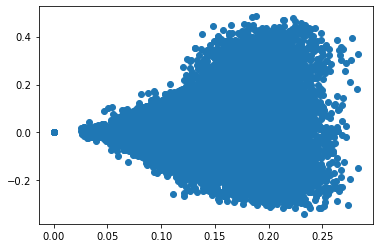

In [204]:
fig = plt.scatter(xs, ys)

In [205]:
km = KMeans(n_clusters=5,
            random_state=20,
            n_init=20)
km.fit(W)

KMeans(n_clusters=5, n_init=20, random_state=20)

In [206]:
num_clusters = 5
X = []
for i in range(num_clusters):
    X.append([])
    
for i in range(50000):
    X[km.labels_[i]].append(W[i].tolist())

In [207]:
color = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'pink'
}

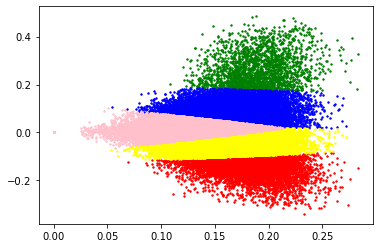

In [208]:
for i in range(num_clusters):
    w = np.array(X[i])
    xs = w[:, 0]
    ys = w[:, 1]
    plt.scatter(xs, ys, c=color[i+1], s=2)
plt.show()